# Best Models for Heart Stroke Prediction

Tyson Ditner | 230147201 | ditner@unbc.ca

Noah Stobbe | 230140171 | stobbe@unbc.ca

CPSC499 - Applied Machine Learning

## References

1. Aurélien Géron, "Hands-On Machine Learning with Scikit-Learn & TensorFlow".

2. https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
#from google.colab import files, drive
#import gdown

C:\Users\oah1s\AppData\Local\Temp\ipykernel_22628\1944762516.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Upload a kaggle.json
#files.upload()

from warnings import catch_warnings
file_id = '1DrXop-XopWp_7HxfSDa-lV19iBVBsVVc' # '1CemmlVVZkHVf3Gufln6dFCWeoZ6ZDr0i'

# URL for downloading the file from Google Drive
url = f'https://drive.google.com/file/d/{file_id}' # f'https://drive.google.com/uc?id={file_id}'

# Path to save the downloaded file
file_path = '/content/drive/MyDrive/heart-disease-dataset.zip'
folder_path = '/content/drive'

# Create the path
try:
    os.mkdir(folder_path)
    os.mkdir(folder_path + '/MyDrive')
except OSError as error:
    print(error)

# Download the file
gdown.download(url, file_path, quiet=False)
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

raw_data = pd.read_csv(file_path)

"""
dataset = 'heart-disease-dataset'
!rm -r $dataset

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
"""

"""
!kaggle datasets download -d mirzahasnine/heart-disease-dataset
"""

"""
import zipfile
zip_ref = zipfile.ZipFile('/content/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
"""

In [2]:
raw_data = pd.read_csv("data/heart_disease.csv", sep=',')

In [3]:
raw_data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


'education' does not seem like a relevant heart disease predictor. We will drop this column.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='cigsPerDay', ylabel='age'>,
        <Axes: xlabel='totChol', ylabel='age'>,
        <Axes: xlabel='heartRate', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='cigsPerDay'>,
        <Axes: xlabel='cigsPerDay', ylabel='cigsPerDay'>,
        <Axes: xlabel='totChol', ylabel='cigsPerDay'>,
        <Axes: xlabel='heartRate', ylabel='cigsPerDay'>],
       [<Axes: xlabel='age', ylabel='totChol'>,
        <Axes: xlabel='cigsPerDay', ylabel='totChol'>,
        <Axes: xlabel='totChol', ylabel='totChol'>,
        <Axes: xlabel='heartRate', ylabel='totChol'>],
       [<Axes: xlabel='age', ylabel='heartRate'>,
        <Axes: xlabel='cigsPerDay', ylabel='heartRate'>,
        <Axes: xlabel='totChol', ylabel='heartRate'>,
        <Axes: xlabel='heartRate', ylabel='heartRate'>]], dtype=object)

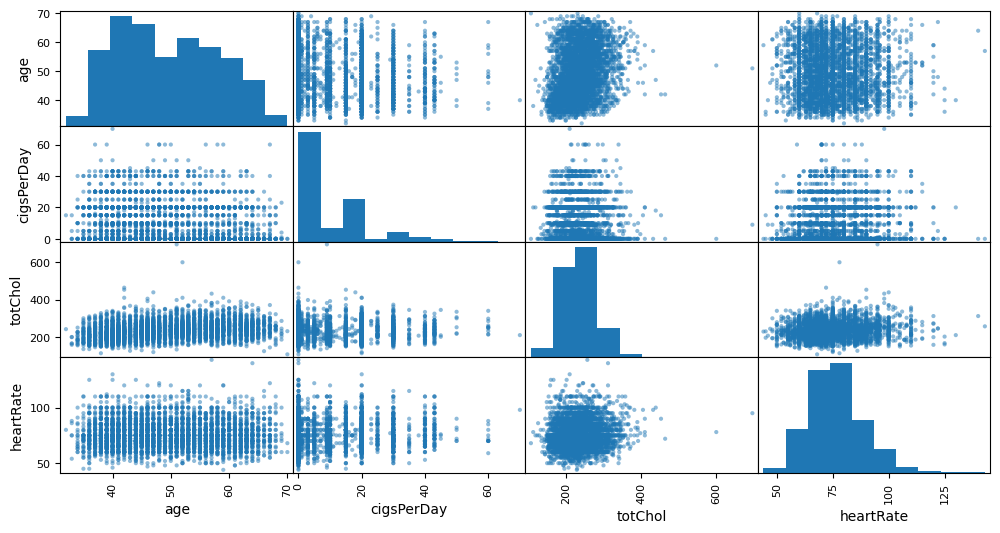

In [4]:
from pandas.plotting import scatter_matrix
attributes_scatter = ["age", "cigsPerDay", "totChol", "heartRate"]
scatter_matrix(raw_data[attributes_scatter], figsize=(12, 6))

Check for null values

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' contain null values

In [6]:
raw_data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


## Preprocessing

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Encode non-numerical features numerically

class TransformEncoder(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    # Encode Gender and Geography as matrices with a single 1 per row
    def transform(self, X, y=None):

        one_hot_encoder = OneHotEncoder()

        # Encode "Gender"
        column_names = ["Female", "Male"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Gender']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['Female'] = X['Female'].astype('int64')
        X['Male'] = X['Male'].astype('int64')

        # Encode "prevalentStroke"
        column_names = ["prevalentStroke", "!prevalentStroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['prevalentStroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['prevalentStroke'] = X['prevalentStroke'].astype('int64')
        X['!prevalentStroke'] = X['!prevalentStroke'].astype('int64')

        # Encode "Heart_ stroke"
        column_names = ["!heartStroke", "heartStroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Heart_ stroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['!heartStroke'] = X['!heartStroke'].astype('int64')
        X['heartStroke'] = X['heartStroke'].astype('int64')

        return X

In [8]:
class TransformImputer(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    def transform(self, X, y=None):
        simpleImputer1 = SimpleImputer(strategy="mean") # Strategy: fill null values in with mean values
        simpleImputer2 = SimpleImputer(strategy="most_frequent") # Strategy: majority vote
        X["cigsPerDay"] = simpleImputer1.fit_transform(X[["cigsPerDay"]]) # Fill null 'cigsPerDay' values with mean
        X["BPMeds"] = simpleImputer1.fit_transform(X[["BPMeds"]]) # Fill null 'BPMeds' values with mean
        X["totChol"] = simpleImputer1.fit_transform(X[["totChol"]]) # Fill null 'totChol' values with mean
        X["BMI"] = simpleImputer1.fit_transform(X[["BMI"]]) # Fill null 'BMI' values with mean
        X["heartRate"] = simpleImputer1.fit_transform(X[["heartRate"]]) # Fill null 'heartRate' values with mean
        X["glucose"] = simpleImputer1.fit_transform(X[["glucose"]]) # Fill null 'glucose' values with mean
        return X

In [9]:
class TransformDropper(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        return self
    
    # Drop the specified columns (not rows, hence axis=1):
    def transform(self, X, y=None):
        return X.drop(["education", "Gender", "!heartStroke", "Heart_ stroke"], axis=1, errors="ignore")

In [10]:
from sklearn.pipeline import Pipeline

# Enable cleaning data to be accomplished with 1 command
clean_data = Pipeline([("transform_encoder", TransformEncoder()),
                       ("transform_imputer", TransformImputer()),
                       ("transform_dropper", TransformDropper())])
cleaned_data = clean_data.fit_transform(raw_data)
cleaned_data.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Female,Male,!prevalentStroke,heartStroke
0,39,0,0.0,0.0,1,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0,0
1,46,0,0.0,0.0,1,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,0,0
2,48,1,20.0,0.0,1,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0
3,61,1,30.0,0.0,1,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1
4,46,1,23.0,0.0,1,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1,0,0,0


In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               4238 non-null   int64  
 1   currentSmoker     4238 non-null   int64  
 2   cigsPerDay        4238 non-null   float64
 3   BPMeds            4238 non-null   float64
 4   prevalentStroke   4238 non-null   int64  
 5   prevalentHyp      4238 non-null   int64  
 6   diabetes          4238 non-null   int64  
 7   totChol           4238 non-null   float64
 8   sysBP             4238 non-null   float64
 9   diaBP             4238 non-null   float64
 10  BMI               4238 non-null   float64
 11  heartRate         4238 non-null   float64
 12  glucose           4238 non-null   float64
 13  Female            4238 non-null   int64  
 14  Male              4238 non-null   int64  
 15  !prevalentStroke  4238 non-null   int64  
 16  heartStroke       4238 non-null   int64  


<Axes: >

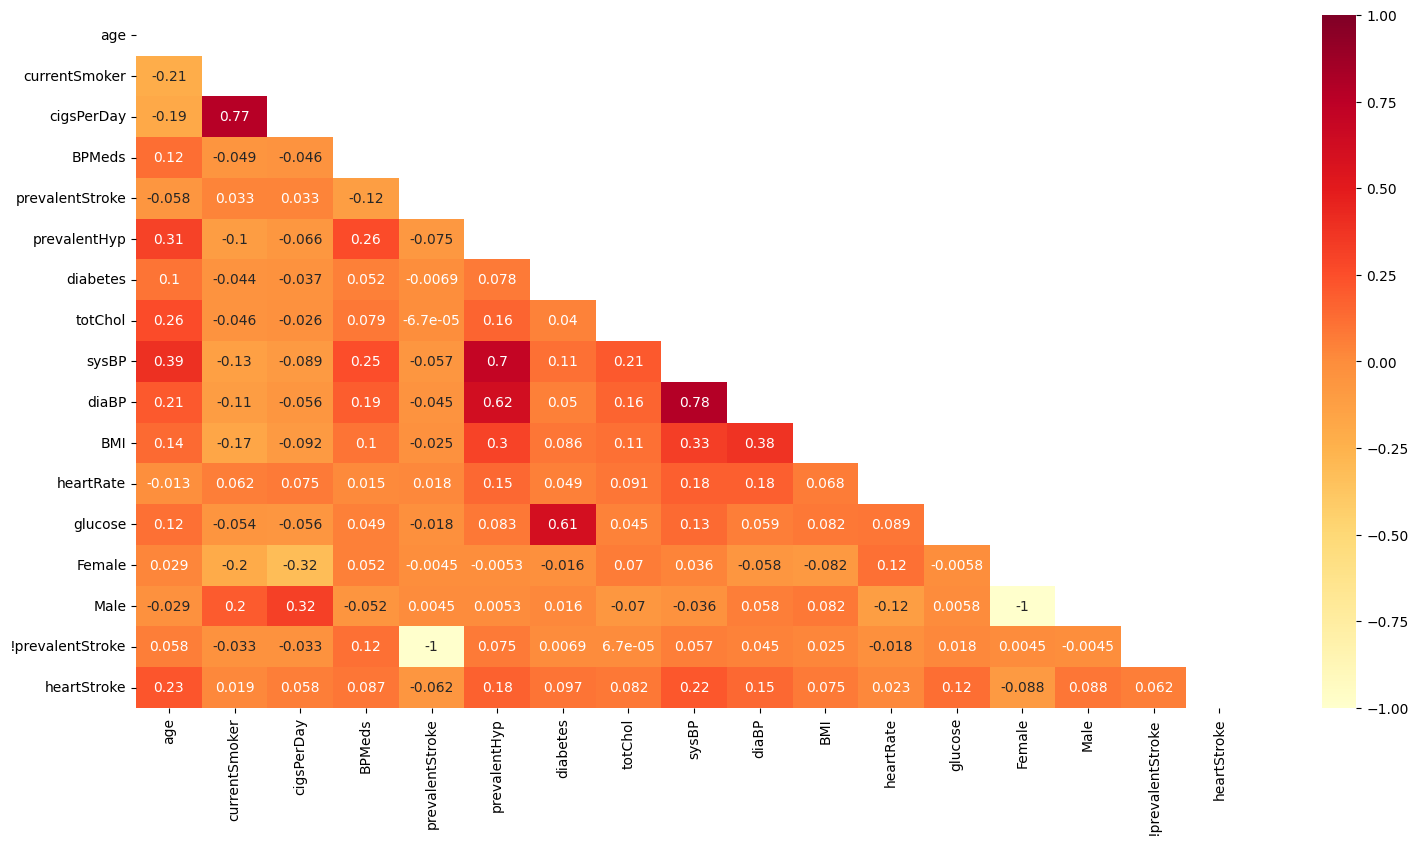

In [12]:
mask = np.triu(np.ones_like(cleaned_data.corr(numeric_only=True)))
plt.figure(figsize=(18,9))
sns.heatmap(cleaned_data.corr(numeric_only=True), cmap="YlOrRd", annot=True, mask=mask, vmin=-1, vmax=1)

## Model Building
### Split dataset

In [13]:
def get_X_y(data):

    X = data.drop(["heartStroke"], axis=1)
    y = data["heartStroke"]

    return X, y

In [14]:
# Shuffle the data before splitting to reduce chance of abnormal distribution
cleaned_data = cleaned_data.sample(frac=1, random_state=0)

X, y = get_X_y(cleaned_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [15]:
train_stats = X_train.describe() # Get the mean of training data
train_stats = train_stats.transpose()

#### Normalization

In [16]:
def scale_X_y(X, y):
    X_data = (X - train_stats['mean']) / train_stats['std']
    y_data = y

    return X_data, y_data

In [17]:
X_train, y_train = scale_X_y(X_train, y_train)
X_test, y_test = scale_X_y(X_test, y_test)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 1690 to 2953
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   float64
 1   currentSmoker     3390 non-null   float64
 2   cigsPerDay        3390 non-null   float64
 3   BPMeds            3390 non-null   float64
 4   prevalentStroke   3390 non-null   float64
 5   prevalentHyp      3390 non-null   float64
 6   diabetes          3390 non-null   float64
 7   totChol           3390 non-null   float64
 8   sysBP             3390 non-null   float64
 9   diaBP             3390 non-null   float64
 10  BMI               3390 non-null   float64
 11  heartRate         3390 non-null   float64
 12  glucose           3390 non-null   float64
 13  Female            3390 non-null   float64
 14  Male              3390 non-null   float64
 15  !prevalentStroke  3390 non-null   float64
dtypes: float64(16)
memory usage: 450.2 KB


## Model Implementation

In [18]:
def plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, myTitle, label=None):
    plt.plot(fpr_train, tpr_train, linewidth=2, label = "Train")
    plt.plot(fpr_test, tpr_test, linewidth=2, label = "Test")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.legend()
    plt.title(myTitle + " ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

### KNN

Bagging Classifier:

Train Accuracy: 0.8731563421828908
Test Accuracy: 0.8384433962264151
Train Precision: 0.7880794701986755
Test Precision: 0.34375
Train Recall: 0.23017408123791103
Test Recall: 0.08661417322834646
Train F1: 0.3562874251497006
Test F1: 0.13836477987421383
Train ROC Score: 0.6095179490770132
Test ROC Score: 0.5287439798180568


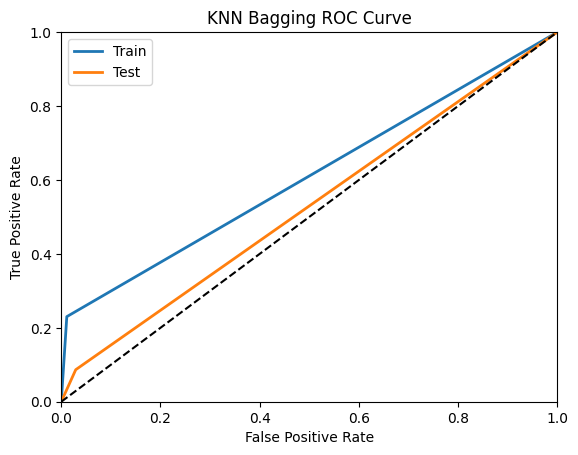

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

param_distribution_knn = [
    {'p': [0.5, 1.0, 1.5, 2.0], 'leaf_size': [20, 30, 40]}
]

knn = KNeighborsClassifier()
grid_search_knn = RandomizedSearchCV(knn, param_distribution_knn, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_knn = BaggingClassifier(estimator=grid_search_knn, random_state=0)

bag_knn.fit(X_train, y_train)
y_train_pred_knn_bag = bag_knn.predict(X_train)
y_test_pred_knn_bag = bag_knn.predict(X_test)

# Results
knn_bag_acc = metrics.accuracy_score(y_test, y_test_pred_knn_bag)
knn_bag_pre = metrics.precision_score(y_test, y_test_pred_knn_bag)
knn_bag_rec = metrics.recall_score(y_test, y_test_pred_knn_bag)
knn_bag_f1 = metrics.f1_score(y_test, y_test_pred_knn_bag)
knn_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_knn_bag)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_knn_bag))
print("Test Accuracy:", knn_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_knn_bag))
print("Test Precision:", knn_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_knn_bag))
print("Test Recall:", knn_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_knn_bag))
print("Test F1:", knn_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_knn_bag))
print("Test ROC Score:", knn_bag_roc)

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_knn_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_knn_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "KNN Bagging")
plt.show()

### Logistic Regression

Bagging Classifier:

Train Accuracy: 0.8548672566371681
Test Accuracy: 0.8573113207547169
Train Precision: 0.7450980392156863
Test Precision: 0.65
Train Recall: 0.0735009671179884
Test Recall: 0.10236220472440945
Train F1: 0.13380281690140844
Test F1: 0.17687074829931973
Train ROC Score: 0.5344880401200802
Test ROC Score: 0.5463267334301659

Ada Boost Classifier:

bstging Classifier:

Train Accuracy: 0.8474926253687316
Test Accuracy: 0.8502358490566038
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1: 0.0
Test F1: 0.0
Train ROC Score: 0.5
Test ROC Score: 0.5


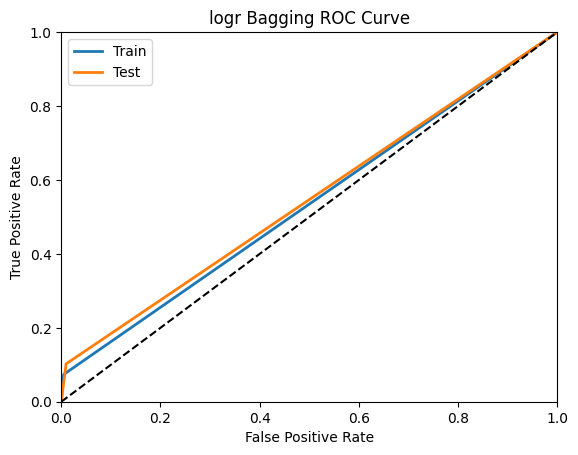

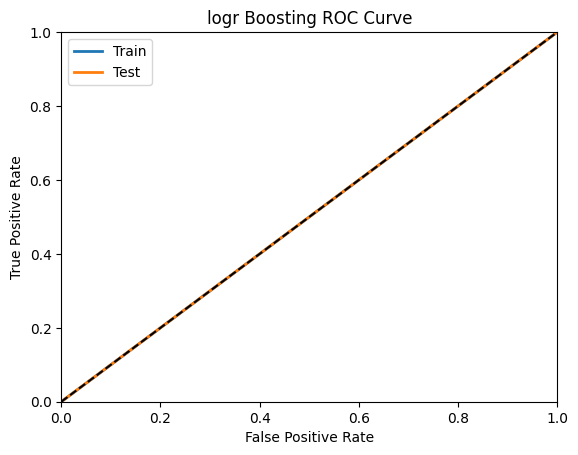

In [20]:
from sklearn.linear_model import LogisticRegression

param_distribution_logr = [
    {'C': [0.1, 1.0, 5.0, 10.0, 20.0]}
]

logr = LogisticRegression(random_state=0)
grid_search_logr = RandomizedSearchCV(logr, param_distribution_logr, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_logr = BaggingClassifier(estimator=grid_search_logr, random_state=0)

bag_logr.fit(X_train, y_train)
y_train_pred_logr_bag = bag_logr.predict(X_train)
y_test_pred_logr_bag = bag_logr.predict(X_test)

bst_logr = AdaBoostClassifier(estimator=logr, random_state=0, n_estimators=5, algorithm='SAMME')

bst_logr.fit(X_train, y_train)
y_train_pred_logr_bst = bst_logr.predict(X_train)
y_test_pred_logr_bst = bst_logr.predict(X_test)

# Results
logr_bag_acc = metrics.accuracy_score(y_test, y_test_pred_logr_bag)
logr_bag_pre = metrics.precision_score(y_test, y_test_pred_logr_bag)
logr_bag_rec = metrics.recall_score(y_test, y_test_pred_logr_bag)
logr_bag_f1 = metrics.f1_score(y_test, y_test_pred_logr_bag)
logr_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_logr_bag)

logr_bst_acc = metrics.accuracy_score(y_test, y_test_pred_logr_bst)
logr_bst_pre = metrics.precision_score(y_test, y_test_pred_logr_bst)
logr_bst_rec = metrics.recall_score(y_test, y_test_pred_logr_bst)
logr_bst_f1 = metrics.f1_score(y_test, y_test_pred_logr_bst)
logr_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_logr_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_logr_bag))
print("Test Accuracy:", logr_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_logr_bag))
print("Test Precision:", logr_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_logr_bag))
print("Test Recall:", logr_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_logr_bag))
print("Test F1:", logr_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_logr_bag))
print("Test ROC Score:", logr_bag_roc)

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_logr_bst))
print("Test Accuracy:", logr_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_logr_bst))
print("Test Precision:", logr_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_logr_bst))
print("Test Recall:", logr_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_logr_bst))
print("Test F1:", logr_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_logr_bst))
print("Test ROC Score:", logr_bst_roc)

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_logr_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_logr_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "logr Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_logr_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_logr_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "logr Boosting")
plt.show()